# Семинар по обучению полносвязных нейросетей в Pytorch

На этом семинаре мы будем обучать полносвзяную нейроную сеть на данных MNIST - изображениях рукописных цифр.

Мы будем использовать библиотеку Pytorch - это одна из двух наиболее популярных и часто используемых библиотек для обучения нейронных сетей.

Отметкой __Задание__ помечены ячейки, в которых Вам нужно написать код. Обязательно выполните все остальные ячейки!

### Загрузка данных

In [5]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.utils.data
import torchvision

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

Мы будем работать с данными MNIST: это набор из 60000 изображений цифр размером 28x28. 

В Pytorch есть своя обертка, позволяющая скачивать MNIST автоматически:

In [6]:
train_dataset = torchvision.datasets.MNIST('.', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

train_loader = torch.utils.data.DataLoader(
  train_dataset,
  batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST('.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

test_loader = torch.utils.data.DataLoader(
  test_dataset,
  batch_size=64, shuffle=True)

Данные уже разделены на обучающую и тестовую части!

Посмотрим на форму всех загруженных переменных:

In [7]:
train_dataset.train_data.shape, train_dataset.train_labels.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [8]:
test_dataset.test_data.shape, test_dataset.test_labels.shape

(torch.Size([10000, 28, 28]), torch.Size([10000]))

Визуализируем несколько объектов обучающей выборки:

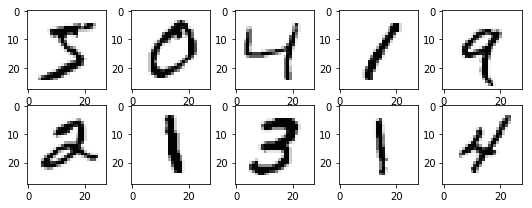

In [9]:
plt.figure(figsize=(9, 3.2))
for im in range(10):
    plt.subplot(2, 5, im+1)
    plt.imshow(train_dataset.train_data[im], cmap="Greys")

А вот так выглядят данные в виде таблицы объекты-признаки:

In [10]:
train_dataset.train_data[:2]

tensor([[[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]]], dtype=torch.uint8)

### Сборка нейронной сети

Нейронные сети обычно "собирают" из готовых слоев. В методе \_\_init\_\_ нужно указать все слои, которые будут использованы, а в методе forward нужно указать, как выполняется _проход вперед_. Иными словами, какие преобразования нужно выполнить, чтобы получить предсказания.

__Задание 1.__
Составьте нейронную сеть со следующей архитектурой: 
* Входной слой размера 28*28 нейронов (создавать как отдельную переменнуэ не нужно)
* Полносвязный слой с 30 нейронами
* Нелинейность ReLU
* Полносязный слой с 10 нейронами (по числу классов)


В методе \_\_init\_\_ создайте переменные для хранения всех используемых слоев. 

Вам понадобятся некоторые слои из следующего набора: nn.Linear, nn.Conv2d, nn.ReLU, nn.Sigmoid.

Пример создания переменной для хранения слоя:

self.fc1 = nn.Linear(90, 12), где 90 - число входных нейронов и 12 - число выходных нейронов.

В методе forward укажите, в какой последовательности нужно применять слои к входной переменной x. 

Пример применения созданного выше слоя: y = self.fc1(x)

In [ ]:
class OurFirstNet(nn.Module):
    def __init__(self, k=1):
        super(OurFirstNet, self).__init__()
        # Ваш код здесь
        

    def forward(self, x):
        x = x.reshape(-1, 28*28).float() # преобрахование входного изображения
        # Ваш код здесь
        

Посчитаем параметры нейросети:

In [ ]:
our_model = OurFirstNet()

In [ ]:
def count_parameters(model):
    return sum(param.data.numpy().size for param \
               in model.parameters() if param.requires_grad)

count_parameters(our_model)

### Обучение нейросети

Определим функционал качества (он включает слой Softmax):

In [ ]:
criterion = nn.CrossEntropyLoss()

__Задание 2.__

Задайте оптимизатор, реализующий стохастический градиентный спуск, для обучения Вашей нейронной сети. Используйте torch.optim.SGD, в качестве первого его аргумента используйте our_model.parameters(), в качестве второго задайте длину шага, равную 0.01).

In [ ]:
# Ваш код здесь


Во время обучения модели удобно контролировать качество и на обучении, и на тесте - возникает дублирующий код. Поэтому мы вынесем в отдельную функцию оценку модели, и в отдельную функцию - одну эпоху обучения (один проход по всей обучающей выборке).

In [ ]:
def train_epoch(model, optimizer, train_loader, criterion):
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(x_batch) # проход вперед (выполнение предсказаий)
        
        loss = criterion(output, y_batch) # вычисление функционала качества
        loss.backward() # проход назад (вычисление градиентнов)
        optimizer.step() # шаг стохастического градиентного спуска (обновление параметров)

def evaluate_loss_acc(model, loader, criterion):
    with torch.no_grad(): # сообщаем библиотеке, что вычисление градиентов не потребуется
        cumloss, cumacc = 0, 0
        num_objects = 0
        for x_batch, y_batch in loader:
            output = model(x_batch) # проход вперед (выполнение предсказаий)
            loss = criterion(output, y_batch) # вычисление функционала качества
            pred = torch.max(output, 1)[1] # выбор предсказанных классов
            acc = torch.sum(pred == y_batch) # вычисление точности 

            cumloss += loss.item()
            cumacc += acc.item()
            num_objects += len(x_batch)
    return cumloss / num_objects, cumacc / num_objects
    
    
def train(model, opt, train_loader, test_loader, criterion, \
          n_epochs=10, print_info=True):
    train_log, train_acc_log = [], []
    val_log, val_acc_log = [], []

    for epoch in range(n_epochs):
        train_epoch(model, opt, train_loader, criterion)
        train_loss, train_acc = evaluate_loss_acc(model, train_loader, 
                                                  criterion)
        val_loss, val_acc = evaluate_loss_acc(model, test_loader, 
                                              criterion)

        train_log.append(train_loss)
        train_acc_log.append(train_acc)

        val_log.append(val_loss)
        val_acc_log.append(val_acc)
        
        if print_info:
            print (('Эпоха [%d/%d], функц. кач. (train/test): %.4f/%.4f,'+\
               ' точность (train/test): %.4f/%.4f' )
                   %(epoch+1, n_epochs, \
                     train_loss, val_loss, train_acc, val_acc))
            
    return train_log, train_acc_log, val_log, val_acc_log

__Задание 3.__

Обучите Вашу нейронную сеть. Для этого воспользуйтесь функцией train, передав в нее следующие аргументы (в указанном порядке):
* модель (см. задание 1)
* оптимизатор (см. задание 2)
* train_loader, test_loader, criterion,
* число эпох (используйте 20, можете попробовать значения до 50)

In [ ]:
### Ваш код здесь


Дополнительные задания:
* Попробуйте использовать больше нейронов в каждом слое; больше слоев. Найдите конфигурацию, достигающего наивысшего тестового качетва (accuracy).
* Проведите эксперимент с разным размером мини-батча (по аналогии с экспериментом с длиной шага в примере).
* Для нейросети большего размера (например, 3 слоя по 100 нейронов) попробуйте использовать большее число эпох. Большие нейросети без регуляризации обычно начинают переобучаться, начиная с некоторой эпохи, то есть их качества начинает падать.